In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA

In [35]:
data = pd.read_csv('combined_data_15-03.csv', sep=";", header=0)
#data = data.fillna(0)
data = data.dropna()
basedf = data
data

,App_time,Step_number,Insole_timer,Contact_time,S0_force,S0_start_time,S0_max_time,S0_end_time,S1_force,S1_start_time,...,F1_time,F2_force,F2_time,F3_force,F3_time,Warning_code,Left/Right,Size,Insole_id,session
0,13:55:03.985,1,0,520,70,0,170,470,55,0,...,220,156,460,274,220,0,L,44,6417,1
1,13:55:06.495,2,1300,1730,132,0,240,1730,97,0,...,570,0,0,92,570,0,L,44,6417,1
2,13:55:07.071,3,3340,130,40,0,130,130,27,0,...,130,0,0,0,0,4,L,44,6417,1
3,13:55:10.301,4,5480,1350,93,50,260,810,75,60,...,800,0,0,523,1080,0,L,44,6417,1
4,13:55:12.099,5,7220,1300,119,0,170,820,86,0,...,880,0,0,361,1030,0,L,44,6417,1
5,13:55:13.610,6,8920,1210,136,0,310,970,97,0,...,760,0,0,271,1000,0,L,44,6417,1
6,13:55:15.266,7,10580,1200,105,0,280,1000,82,0,...,510,0,0,337,510,0,L,44,6417,1
7,13:55:16.720,8,12370,1320,76,0,280,1010,46,20,...,850,0,0,194,1010,0,L,44,6417,1
8,13:55:18.829,9,14470,1320,134,0,410,1150,97,10,...,410,0,0,66,1110,0,L,44,6417,1
9,13:55:20.190,10,16390,310,106,0,310,310,67,20,...,310,0,0,0,0,0,L,44,6417,1


In [3]:
data = data.drop(labels=["App_time","Left/Right"], axis=1)
data = data.astype('int')
data["App_time"] = basedf["App_time"]
data["Left/Right"] = basedf["Left/Right"]

In [6]:
data1 = data.loc[data["session"] == 1]
data1L = data.loc[data["Left/Right"] == "L"]
data1R = data.loc[data["Left/Right"] == "R"]

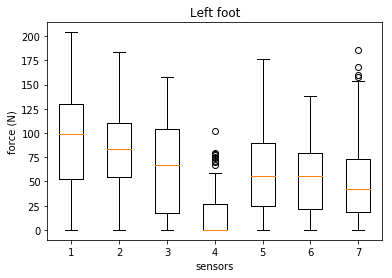

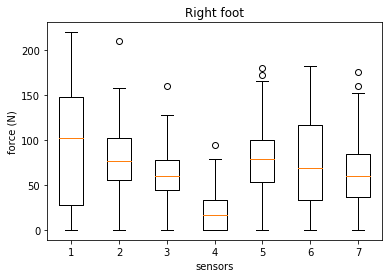

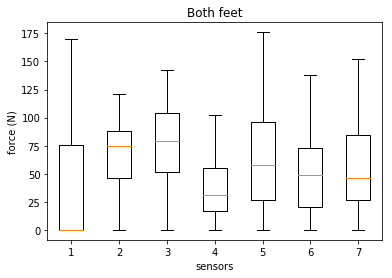

In [27]:
plt.boxplot([data1L["S0_force"],data1L["S1_force"],data1L["S2_force"],data1L["S3_force"],data1L["S4_force"],data1L["S5_force"],data1L["S6_force"]])
plt.ylabel('force (N)')
plt.xlabel('sensors')
plt.title('Left foot')
plt.show()

plt.boxplot([data1R["S0_force"],data1R["S1_force"],data1R["S2_force"],data1R["S3_force"],data1R["S4_force"],data1R["S5_force"],data1R["S6_force"]])
plt.ylabel('force (N)')
plt.xlabel('sensors')
plt.title('Right foot')
plt.show()

plt.boxplot([data1["S0_force"],data1["S1_force"],data1["S2_force"],data1["S3_force"],data1["S4_force"],data1["S5_force"],data1["S6_force"]])
plt.ylabel('force (N)')
plt.xlabel('sensors')
plt.title('Both feet')
plt.show()

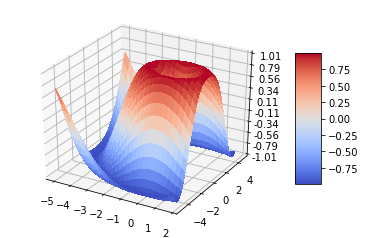

In [44]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#todo 3d heatmap

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 2, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)

#[data1R["S0_force"],data1R["S1_force"],data1R["S2_force"],data1R["S3_force"],data1R["S4_force"],data1R["S5_force"],data1R["S6_force"]]

Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.6, aspect=5)

plt.show()



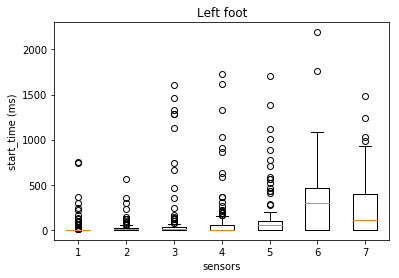

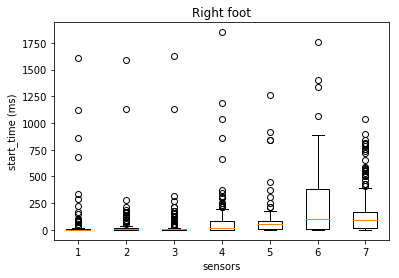

In [12]:
plt.boxplot([data1L["S0_start_time"],data1L["S1_start_time"],data1L["S2_start_time"],data1L["S3_start_time"],data1L["S4_start_time"],data1L["S5_start_time"],data1L["S6_start_time"]])
plt.ylabel('start_time (ms)')
plt.xlabel('sensors')
plt.title('Left foot')
plt.show()

plt.boxplot([data1R["S0_start_time"],data1R["S1_start_time"],data1R["S2_start_time"],data1R["S3_start_time"],data1R["S4_start_time"],data1R["S5_start_time"],data1R["S6_start_time"]])
plt.ylabel('start_time (ms)')
plt.xlabel('sensors')
plt.title('Right foot')
plt.show()

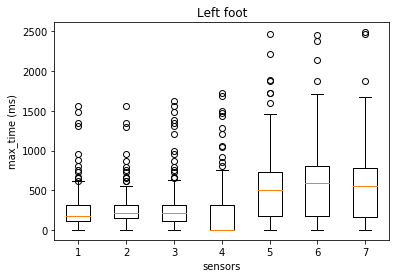

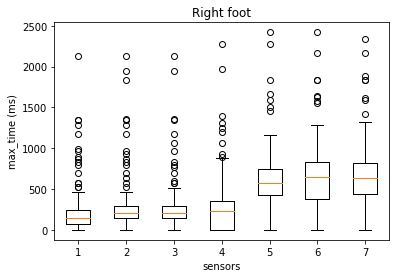

In [13]:
plt.boxplot([data1L["S0_max_time"],data1L["S1_max_time"],data1L["S2_max_time"],data1L["S3_max_time"],data1L["S4_max_time"],data1L["S5_max_time"],data1L["S6_max_time"]])
plt.ylabel('max_time (ms)')
plt.xlabel('sensors')
plt.title('Left foot')
plt.show()

plt.boxplot([data1R["S0_max_time"],data1R["S1_max_time"],data1R["S2_max_time"],data1R["S3_max_time"],data1R["S4_max_time"],data1R["S5_max_time"],data1R["S6_max_time"]])
plt.ylabel('max_time (ms)')
plt.xlabel('sensors')
plt.title('Right foot')
plt.show()

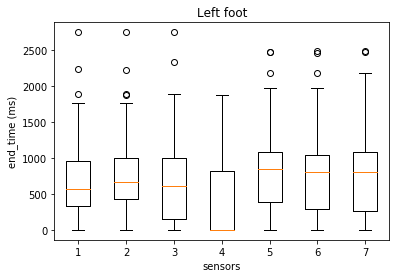

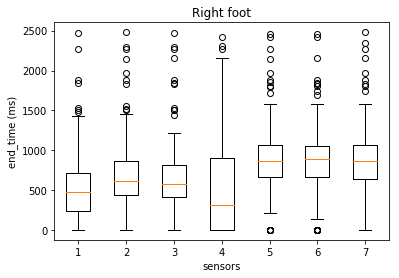

In [29]:
plt.boxplot([data1L["S0_end_time"],data1L["S1_end_time"],data1L["S2_end_time"],data1L["S3_end_time"],data1L["S4_end_time"],data1L["S5_end_time"],data1L["S6_end_time"]])
plt.ylabel('end_time (ms)')
plt.xlabel('sensors')
plt.title('Left foot')
plt.show()

plt.boxplot([data1R["S0_end_time"],data1R["S1_end_time"],data1R["S2_end_time"],data1R["S3_end_time"],data1R["S4_end_time"],data1R["S5_end_time"],data1R["S6_end_time"]])
plt.ylabel('end_time (ms)')
plt.xlabel('sensors')
plt.title('Right foot')
plt.show()

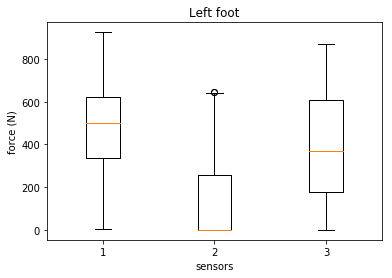

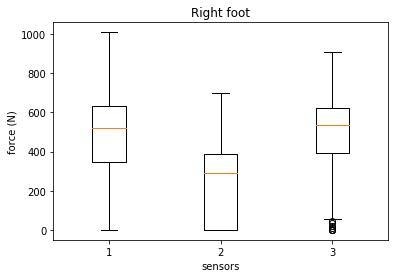

In [18]:
plt.boxplot([data1L["F1_force"],data1L["F2_force"],data1L["F3_force"]])
plt.ylabel('force (N)')
plt.xlabel('sensors')
plt.title('Left foot')
plt.show()

plt.boxplot([data1R["F1_force"],data1R["F2_force"],data1R["F3_force"]])
plt.ylabel('force (N)')
plt.xlabel('sensors')
plt.title('Right foot')
plt.show()

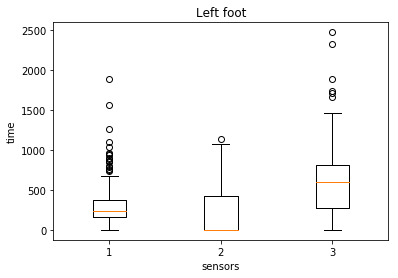

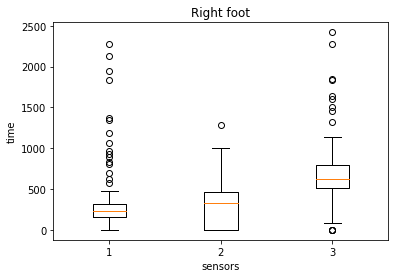

In [20]:
plt.boxplot([data1L["F1_time"],data1L["F2_time"],data1L["F3_time"]])
plt.ylabel('time')
plt.xlabel('sensors')
plt.title('Left foot')
plt.show()

plt.boxplot([data1R["F1_time"],data1R["F2_time"],data1R["F3_time"]])
plt.ylabel('time')
plt.xlabel('sensors')
plt.title('Right foot')
plt.show()

In [21]:
pd.DataFrame.describe(data1)

,Step_number,Insole_timer,Contact_time,S0_force,S0_start_time,S0_max_time,S0_end_time,S1_force,S1_start_time,S1_max_time,...,F1_force,F1_time,F2_force,F2_time,F3_force,F3_time,Warning_code,Size,Insole_id,session
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.0,88.000000,88.0
mean,22.511364,41911.022727,1022.272727,39.965909,25.681818,140.340909,370.000000,67.988636,35.909091,295.113636,...,429.715909,368.636364,80.534091,105.795455,446.988636,675.227273,0.340909,44.0,7681.102273,1.0
std,12.790976,23848.614748,458.442459,53.041829,118.154345,195.291994,493.616725,29.225046,53.015642,266.949538,...,205.208778,313.365791,187.587034,257.810059,253.914118,395.174855,1.173328,0.0,1300.576645,0.0
min,1.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.0,6417.000000,1.0
25%,11.750000,21830.000000,940.000000,0.000000,0.000000,0.000000,0.000000,46.000000,10.000000,220.000000,...,261.250000,240.000000,0.000000,0.000000,273.250000,317.500000,0.000000,44.0,6417.000000,1.0
50%,22.500000,43490.000000,1050.000000,0.000000,0.000000,0.000000,0.000000,74.500000,20.000000,270.000000,...,448.000000,290.000000,0.000000,0.000000,461.500000,730.000000,0.000000,44.0,6417.000000,1.0
75%,33.250000,62130.000000,1245.000000,76.000000,0.000000,280.000000,847.500000,88.000000,40.000000,310.000000,...,604.000000,360.000000,0.000000,0.000000,650.000000,912.500000,0.000000,44.0,9004.000000,1.0
max,45.000000,82160.000000,2420.000000,170.000000,860.000000,990.000000,1730.000000,121.000000,280.000000,1950.000000,...,870.000000,1950.000000,645.000000,1280.000000,870.000000,2420.000000,5.000000,44.0,9004.000000,1.0


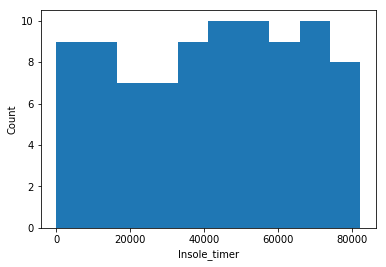

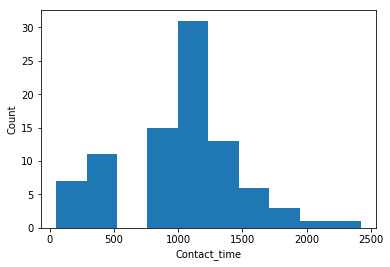

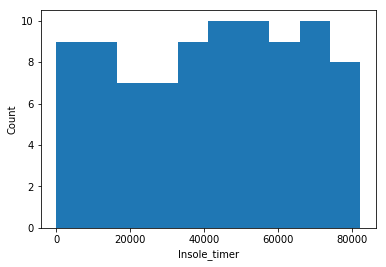

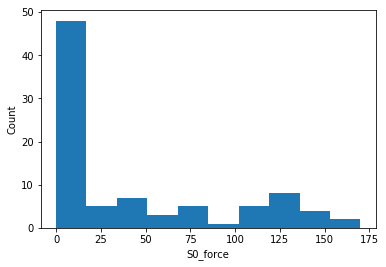

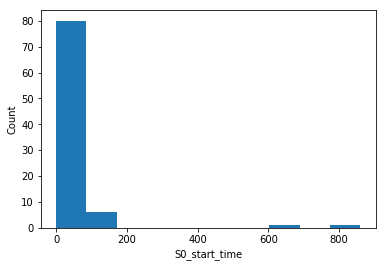

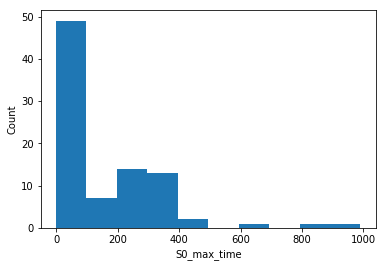

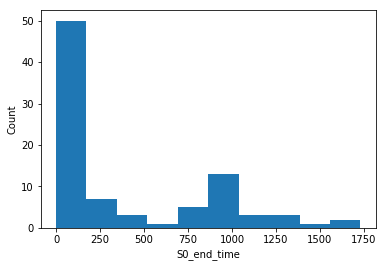

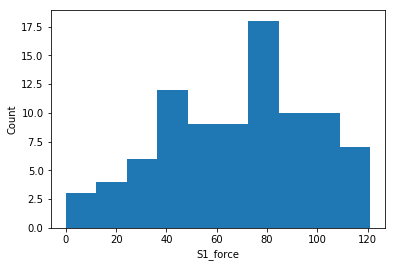

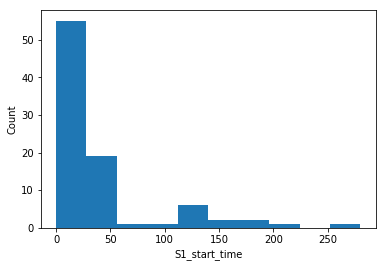

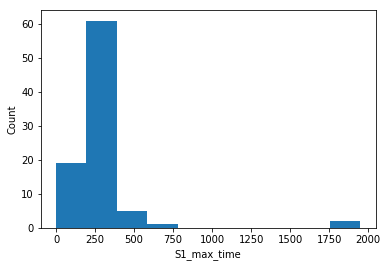

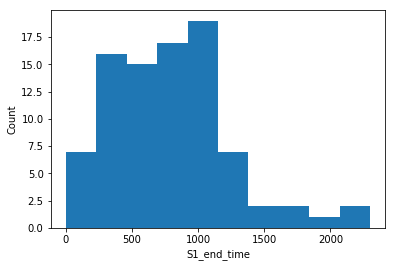

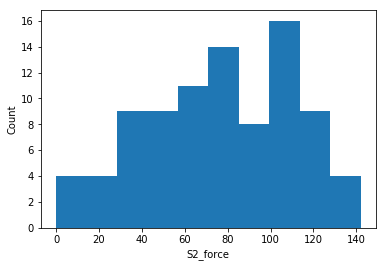

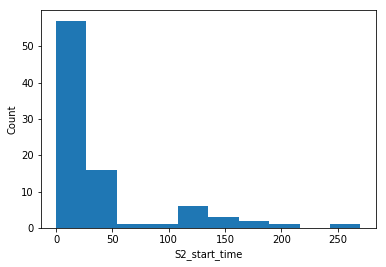

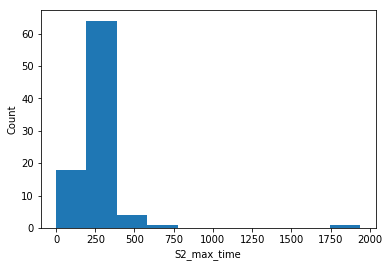

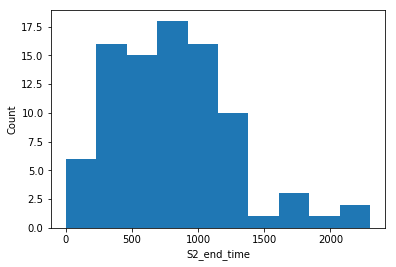

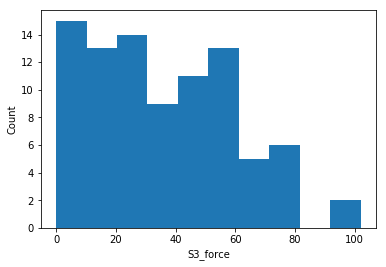

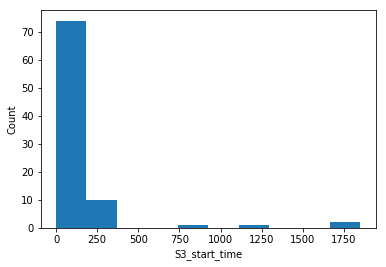

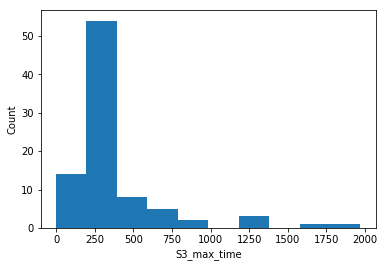

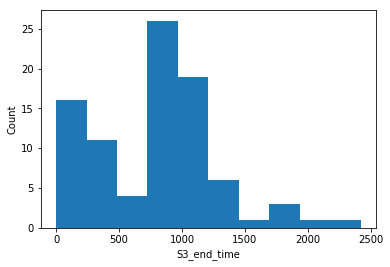

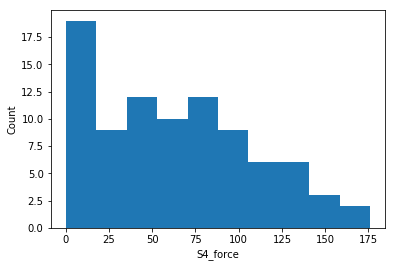

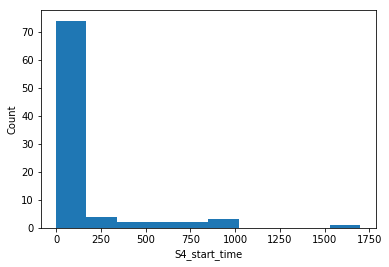

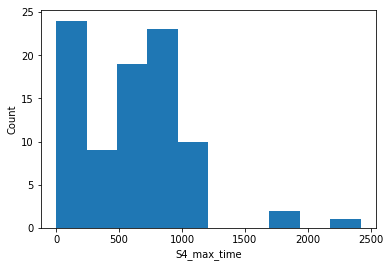

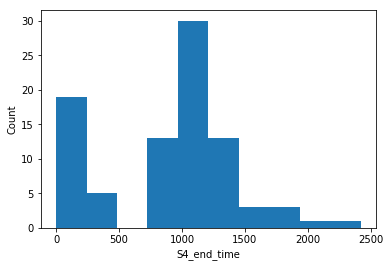

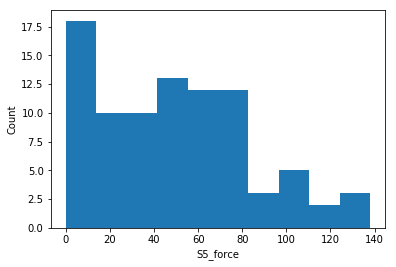

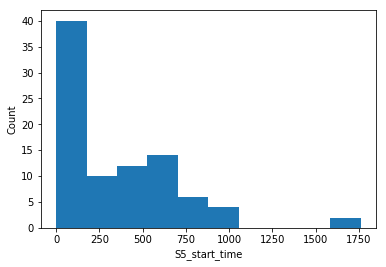

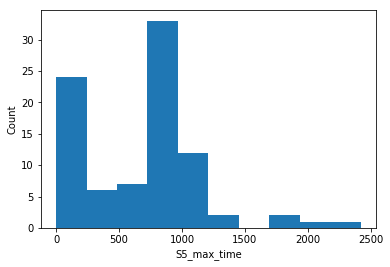

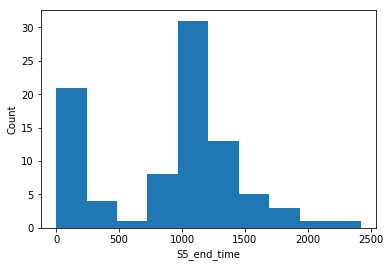

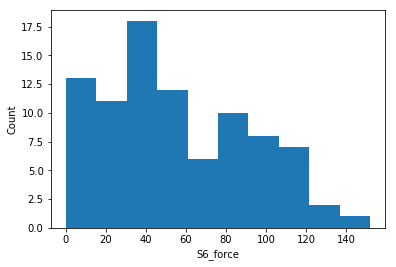

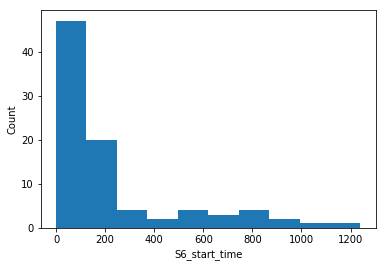

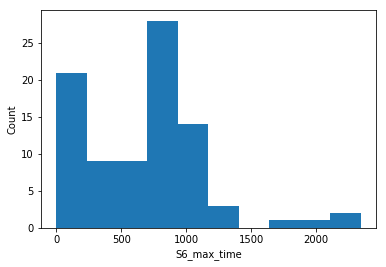

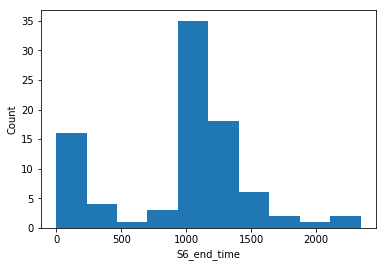

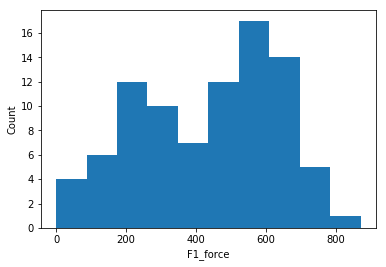

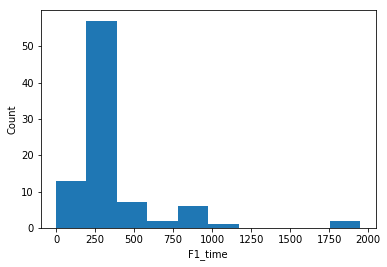

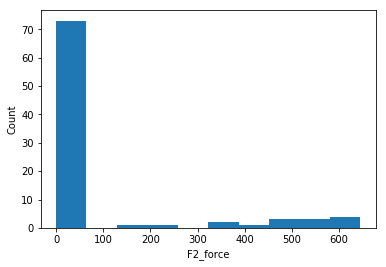

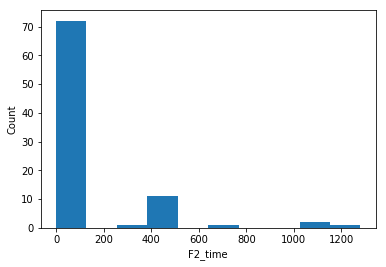

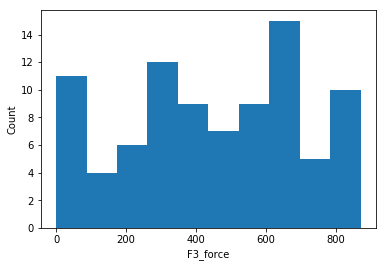

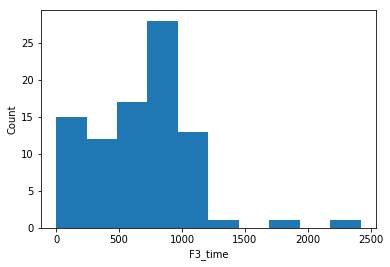

In [22]:
data1 = data.loc[data["session"] == 1]

plt.hist(data1["Insole_timer"])
plt.xlabel('Insole_timer')
plt.ylabel('Count')
plt.show()

plt.hist(data1["Contact_time"])
plt.xlabel('Contact_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["Insole_timer"])
plt.xlabel('Insole_timer')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S0_force"])
plt.xlabel('S0_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S0_start_time"])
plt.xlabel('S0_start_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S0_max_time"])
plt.xlabel('S0_max_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S0_end_time"])
plt.xlabel('S0_end_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S1_force"])
plt.xlabel('S1_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S1_start_time"])
plt.xlabel('S1_start_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S1_max_time"])
plt.xlabel('S1_max_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S1_end_time"])
plt.xlabel('S1_end_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S2_force"])
plt.xlabel('S2_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S2_start_time"])
plt.xlabel('S2_start_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S2_max_time"])
plt.xlabel('S2_max_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S2_end_time"])
plt.xlabel('S2_end_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S3_force"])
plt.xlabel('S3_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S3_start_time"])
plt.xlabel('S3_start_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S3_max_time"])
plt.xlabel('S3_max_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S3_end_time"])
plt.xlabel('S3_end_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S4_force"])
plt.xlabel('S4_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S4_start_time"])
plt.xlabel('S4_start_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S4_max_time"])
plt.xlabel('S4_max_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S4_end_time"])
plt.xlabel('S4_end_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S5_force"])
plt.xlabel('S5_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S5_start_time"])
plt.xlabel('S5_start_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S5_max_time"])
plt.xlabel('S5_max_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S5_end_time"])
plt.xlabel('S5_end_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S6_force"])
plt.xlabel('S6_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S6_start_time"])
plt.xlabel('S6_start_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S6_max_time"])
plt.xlabel('S6_max_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["S6_end_time"])
plt.xlabel('S6_end_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["F1_force"])
plt.xlabel('F1_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["F1_time"])
plt.xlabel('F1_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["F2_force"])
plt.xlabel('F2_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["F2_time"])
plt.xlabel('F2_time')
plt.ylabel('Count')
plt.show()

plt.hist(data1["F3_force"])
plt.xlabel('F3_force')
plt.ylabel('Count')
plt.show()

plt.hist(data1["F3_time"])
plt.xlabel('F3_time')
plt.ylabel('Count')
plt.show()


In [33]:
data1 = data.loc[data["session"] == 1]
#"Insole_timer"
values_cols = ["Contact_time","S0_force","S0_start_time","S0_max_time","S0_end_time","S1_force","S1_start_time","S1_max_time","S2_force","S2_start_time","S2_max_time","S2_end_time","S3_force","S3_start_time","S3_max_time","S3_end_time","S4_force","S4_start_time","S4_max_time","S4_end_time","S5_force","S5_start_time","","S5_max_time","S5_end_time","S6_force","S6_start_time","S6_max_time","S6_end_time","F1_force","F1_time","F2_force","F2_time","F3_force","F3_time"]

values = data1.loc[:,values_cols]
values

F:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Contact_time,S0_force,S0_start_time,S0_max_time,S0_end_time,S1_force,S1_start_time,S1_max_time,S2_force,S2_start_time,...,S6_force,S6_start_time,S6_max_time,S6_end_time,F1_force,F1_time,F2_force,F2_time,F3_force,F3_time
0,520,70,0,170,470,55,0,170,43,0,...,42,200,440,520,274,220,156,460,274,220
1,1730,132,0,240,1730,97,0,240,100,0,...,24,50,240,1730,577,570,0,0,92,570
2,130,40,0,130,130,27,0,130,29,0,...,0,0,0,0,134,130,0,0,0,0
3,1350,93,50,260,810,75,60,260,84,50,...,49,0,1060,1300,670,800,0,0,523,1080
4,1300,119,0,170,820,86,0,170,102,0,...,18,720,880,1220,650,880,0,0,361,1030
5,1210,136,0,310,970,97,0,310,117,0,...,43,750,970,1190,685,760,0,0,271,1000
6,1200,105,0,280,1000,82,0,280,89,0,...,51,10,510,1200,637,510,0,0,337,510
7,1320,76,0,280,1010,46,20,280,87,0,...,23,1240,1320,1320,532,850,0,0,194,1010
8,1320,134,0,410,1150,97,10,410,112,0,...,0,0,0,0,547,410,0,0,66,1110
9,310,106,0,310,310,67,20,270,103,10,...,0,0,0,0,511,310,0,0,0,0


In [24]:
values = values.astype('int')

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [25]:
pca=PCA(n_components=2, svd_solver='full')
pca.fit(values)

print("variance ", pca.explained_variance_)
print("variance ratio ", pca.explained_variance_ratio_)
print("singular values ", pca.singular_values_)

T=pca.transform(values)
#print(values.shape)
#print(T.shape)

#Dataframe from T
Tdf=pd.DataFrame(T)
Tdf.columns=["c1","c2"]

#Plot with colors
plt.scatter(Tdf["c1"], Tdf["c2"], c="b")
plt.title("PCA scatter plot")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').